In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [287]:
data = pd.read_csv("data.csv")
data.head()
data['combined_shot_type'].unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'], dtype=object)

In [288]:
nona = data[pd.notnull(data['shot_made_flag'])]

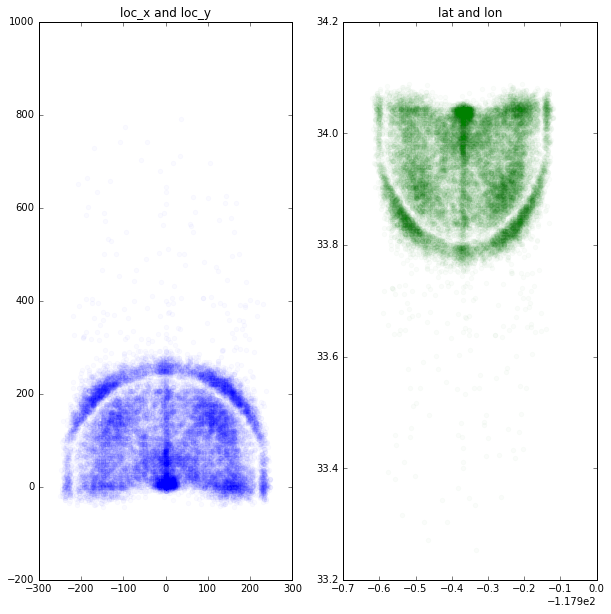

In [289]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(nona.loc_x, nona.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(nona.lon, nona.lat, color='green', alpha=alpha)
plt.title('lat and lon')

In [290]:
data['dist'] = np.sqrt(data['loc_x']**2 + data['loc_y']**2)

In [291]:
data['remaining_time'] = data['minutes_remaining'] * 60 + data['seconds_remaining']

In [292]:
data.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id', u'dist', u'remaining_time'],
      dtype='object')

In [293]:
data['season'] = data['season'].apply(lambda x: int(x.split('-')[1]) )
print(data['season'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 97 98 99  0]


In [294]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', \
         'game_date', \
         'period', 'combined_shot_type']
for drop in drops:
    data = data.drop(drop, 1)

In [295]:
data.head()

,action_type,playoffs,season,shot_made_flag,shot_type,shot_zone_basic,opponent,dist,remaining_time
0,Jump Shot,0,1,NaN,2PT Field Goal,Mid-Range,POR,181.859836,627
1,Jump Shot,0,1,0.0,2PT Field Goal,Mid-Range,POR,157.000000,622
2,Jump Shot,0,1,1.0,2PT Field Goal,Mid-Range,POR,168.600119,465
3,Jump Shot,0,1,0.0,2PT Field Goal,Mid-Range,POR,222.865430,412
4,Driving Dunk Shot,0,1,1.0,2PT Field Goal,Restricted Area,POR,0.000000,379


In [296]:
categorical_vars = ['action_type', 'shot_type', 'shot_zone_basic', 'opponent']
for var in categorical_vars:
    data = pd.concat([data, pd.get_dummies(data[var], prefix=var)], 1)
    data = data.drop(var, 1)

In [297]:
data.columns

Index([u'playoffs', u'season', u'shot_made_flag', u'dist', u'remaining_time',
       u'action_type_Alley Oop Dunk Shot', u'action_type_Alley Oop Layup shot',
       u'action_type_Cutting Finger Roll Layup Shot',
       u'action_type_Cutting Layup Shot', u'action_type_Driving Bank shot',
       ...
       u'opponent_PHI', u'opponent_PHX', u'opponent_POR', u'opponent_SAC',
       u'opponent_SAS', u'opponent_SEA', u'opponent_TOR', u'opponent_UTA',
       u'opponent_VAN', u'opponent_WAS'],
      dtype='object', length=104)

In [298]:
df = data[pd.notnull(data['shot_made_flag'])]
submission = data[pd.isnull(data['shot_made_flag'])]
submission.head()

,playoffs,season,shot_made_flag,dist,remaining_time,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,0,1,NaN,181.859836,627,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,1,NaN,28.017851,485,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0,1,NaN,0.000000,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19,0,1,NaN,0.000000,646,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32,0,1,NaN,179.847157,686,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [299]:
submission = submission.drop('shot_made_flag', 1)

In [300]:
train = df.drop('shot_made_flag', 1)
train_y = df['shot_made_flag']
train_y.unique()

array([ 0.,  1.])

In [301]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
import time
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [302]:
best_n = 0;
best_d = 0;
min_score = 1000000
for n in (1, 8, 10, 12, 20):
    for d in (1, 2, 3, 8, 10, 15):
        rfc = RandomForestClassifier(n_estimators=n, max_depth=d)
        rfc_score = 0;
        for train_k, test_k in KFold(len(train), n_folds=10, shuffle=True):
            rfc.classes_ = [1, 0]
            rfc.fit(train.iloc[train_k], train_y.iloc[train_k])
            pred = rfc.predict_proba(train.iloc[test_k])
            #print(pred[:, 0])
            rfc_score += logloss(train_y.iloc[test_k], pred[:, 0]) / 10.0
        print(rfc_score)
        if (rfc_score < min_score):
            min_score = rfc_score
            best_n = n
            best_d = d

0.726291083042
0.775389570307
0.82061856734
1.20511883734
1.61216969701
2.86546453111
0.73938039805
0.765172020373
0.780210751421
0.85813136603
0.889750948881
0.967845785412
0.734150862137
0.76339684571
0.778163955196
0.858138119767
0.891589148109
0.951232203272
0.735070789336
0.761262458945
0.784567358825
0.857729383757
0.888578833652
0.954515659439
0.738973960336
0.763731298824
0.781737604981
0.86618730358
0.894047815633
0.940611592933


In [303]:
print(best_n)
print(best_d)
print(min_score)

1
1
0.726291083042


In [304]:
model = RandomForestClassifier(n_estimators = best_n, max_depth = best_d)
model.classes_ = [1, 0]
model.fit(train, train_y)
pred = model.predict_proba(submission)

In [305]:
print pred

[[ 0.55237389  0.44762611]
 [ 0.55237389  0.44762611]
 [ 0.55237389  0.44762611]
 ..., 
 [ 0.55237389  0.44762611]
 [ 0.55237389  0.44762611]
 [ 0.55237389  0.44762611]]


In [306]:
sub = pd.read_csv("sample_submission.csv")
sub['shot_made_flag'] = pred
sub.to_csv("predict_submission.csv", index=False)